In [1]:
import pandas as pd
import altair as alt
from vega_datasets import data

alt.data_transformers.enable('json')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('json')

### LOAD THE CLEAN CSV

In [2]:
df = pd.read_csv('../data/cleaned_data.csv',
                 usecols=['points', 'title', 'description', 'price',
                           'designation', 'variety', 'winery', 'county',
                           'county_id', 'state_id', 'value_scaled', 'value', 'state', 'region_1'])

In [3]:
df.head()

,points,title,description,price,designation,variety,region_1,state,winery,county,county_id,state_id,value,value_scaled
0,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,Michigan,St. Julian,Van Buren County,26159,26,6.692308,85.869
1,85,St. Julian NV Cathermsn's Port (Lake Michigan ...,Stewed fig and blackberry aromas meet a dried ...,16.0,Cathermsn's,Port,Lake Michigan Shore,Michigan,St. Julian,Van Buren County,26159,26,5.312500,83.640
2,83,St. Julian 2013 Braganini Reserve Traminette (...,A citrus-rind aroma takes on an earthy bee-pol...,15.0,Braganini Reserve,Traminette,Michigan,Michigan,St. Julian,Van Buren County,26159,26,5.533333,81.755
3,86,St. Julian NV Solera Cream Sherry (Lake Michig...,Aromas of roasted almond and pecan meet dried ...,16.0,Solera Cream,Sherry,Lake Michigan Shore,Michigan,St. Julian,Van Buren County,26159,26,5.375000,84.624
4,88,St. Julian 2013 Braganini Reserve Late Harvest...,Candied peach and apricot aromas meld with dus...,20.0,Braganini Reserve Late Harvest,Vignoles,Lake Michigan Shore,Michigan,St. Julian,Van Buren County,26159,26,4.400000,86.240


In [4]:
winery_df = df.groupby(['variety']).size().reset_index(name='counts')
winery_df = winery_df.sort_values(by='counts')

print("Greater than 100", len(winery_df.query('counts > 100')))
print("Greater than 500",len(winery_df.query('counts > 500')))
print("Greater than 1000", len(winery_df.query('counts > 1000')))

# for i, group in winery_df.iterrows():
#     print(group['counts'])
#     if winery_df.query('counts == @i').sum()['counts'] > 0:
#         print(i, winery_df.query('counts == @i').sum()['counts'])
    

Greater than 100 35
Greater than 500 19
Greater than 1000 10


In [5]:
winery_df = df.groupby(['winery']).size().reset_index(name='counts')
winery_df = winery_df.sort_values(by='counts')

print("Greater than 10", len(winery_df.query('counts > 10')))
print("Greater than 50",len(winery_df.query('counts > 50')))
print("Greater than 100", len(winery_df.query('counts > 100')))

Greater than 10 1362
Greater than 50 163
Greater than 100 16


In [6]:
df.query('county == "Pinellas County"')

,points,title,description,price,designation,variety,region_1,state,winery,county,county_id,state_id,value,value_scaled


In [7]:
state_counts = df.groupby(['state', 'state_id']).size().reset_index(name='counts')
county_counts = df.groupby(['county', 'county_id']).size().reset_index(name='counts')
county_counts

,county,county_id,counts
0,Ada County,16001,58
1,Adams County,8001,3
2,Alameda County,6001,877
3,Albemarle County,51003,120
4,Allegan County,26005,7
...,...,...,...
233,Yamhill County,41071,2737
234,Yates County,36123,400
235,Yavapai County,4025,35
236,Yolo County,6113,236


### GET THE COUNTS BY STATE AND COUNTY

In [8]:
# Group and aggregate the data by States
states_grouped = df.groupby(['state', 'state_id'], as_index=False)
wine_states = states_grouped.agg({'points': ['mean'],
                                  'price': ['mean'],
                                  'value': ['mean'],
                                  'description': ['count']})

wine_states.columns = wine_states.columns.droplevel(level=1)
wine_states = wine_states.rename(columns={"state": "State",
                                          "state_id": "State ID",
                                          "description": "Num Reviews",
                                          "points": 'Ave Points',
                                          "price": 'Ave Price',
                                          "value": 'Ave Value'})

# Group and aggregate the data by Counties
counties_grouped = df.groupby(['county', 'county_id'], as_index=False)
wine_counties = counties_grouped.agg({'points': ['mean'],
                                     'price': ['mean'],
                                     'value': ['mean'],
                                     'description': ['count']})

wine_counties.columns = wine_counties.columns.droplevel(level=1)
wine_counties = wine_counties.rename(columns={"county": 'County',
                                              "county_id": 'County ID',
                                              "description": "Num Reviews",
                                              "points": 'Ave Points',
                                              "price": 'Ave Price',
                                              "value": 'Ave Value'})

wine_states

# variety_df = df[['state', 'variety']]
# variety_df
# pd.merge()

,State,State ID,Ave Points,Ave Price,Ave Value,Num Reviews
0,Arizona,4,85.022222,29.272727,3.377808,45
1,California,6,88.704248,39.410612,3.148940,33802
2,Colorado,8,86.128571,32.628571,3.129285,70
3,Connecticut,9,84.000000,15.333333,5.812121,3
4,Florida,12,82.000000,27.000000,3.037037,1
5,Georgia,13,89.000000,46.666667,1.931667,3
6,Hawaii,15,87.000000,28.000000,3.107143,1
7,Idaho,16,86.568528,20.856410,5.032259,197
8,Illinois,17,84.857143,30.285714,2.967468,7
9,Indiana,18,86.500000,12.250000,7.089161,4


### DRAW STATE CHOROPLETH

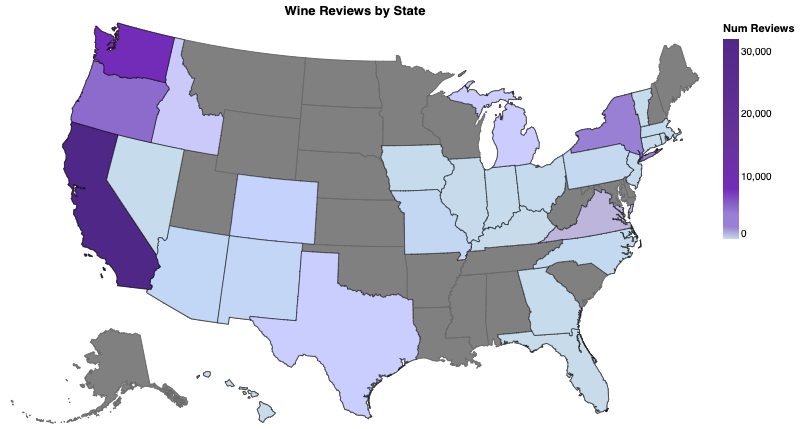

In [9]:
#  ['State','State_ID','Ave Points','Ave Price','Ave Value','Num Reviews'])

counties = alt.topo_feature(data.us_10m.url, 'counties')
states = alt.topo_feature(data.us_10m.url, "states")

colormap = alt.Scale(domain=[0, 100, 1000, 2000, 4000, 8000, 16000, 32000],
                     range=['#C7DBEA', '#CCCCFF', '#B8AED2', '#3A41C61',
                            '#9980D4', '#722CB7', '#663399', '#512888'])

foreground = alt.Chart(states).mark_geoshape().encode(
    color=alt.Color('Num Reviews:Q',
                    scale=colormap),
    tooltip=['State:O', 'State ID:O', 
             'Ave Points:Q','Ave Price:Q',
             'Ave Value:Q','Num Reviews:Q']
).mark_geoshape(
    stroke='black',
    strokeWidth=0.5
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(wine_states, 
                         'State ID', 
                         ['State', 'State ID', 'Ave Points', 'Ave Price', 'Ave Value', 'Num Reviews'])
).project(
    type='albersUsa'
)

background = alt.Chart(states).mark_geoshape(
    fill='gray',
    stroke='dimgray'
).project(
    'albersUsa'
).properties(
    title='Wine Reviews by State'
)

(background + foreground).configure_view(
    height=400,
    width=700,
    strokeWidth=4,
    fill=None,
    stroke=None,
)

### DRAW STATE/COUNTY CHOROPLETH

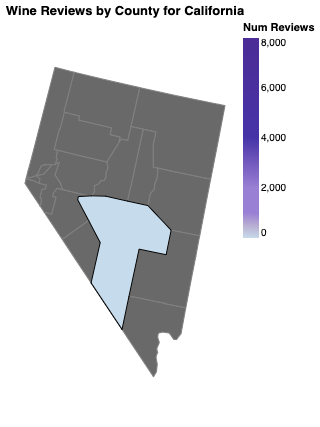

In [10]:
counties = alt.topo_feature(data.us_10m.url, 'counties')

state_id = 32#California = 6
state = 'California'

colormap = alt.Scale(domain=[0, 100, 500, 1000, 2000, 4000, 8000],
                     range=['#C7DBEA', '#CCCCFF', '#B8AED2', '#3A41C61',
                            '#9980D4', '#4634A7', '#4C2C96'])

c_foreground =(
    alt.Chart(counties)
    .mark_geoshape(
        stroke='black',
        strokeWidth=1
    ).encode(
        color=alt.Color('Num Reviews:Q',
              scale=colormap),
        tooltip=['County:O', 'County ID:O', 
                 'Ave Points:Q','Ave Price:Q',
                 'Ave Value:Q','Num Reviews:Q']
    )
    .transform_calculate(state_id = "(datum.id / 1000)|0")
    .transform_filter((alt.datum.state_id)==state_id)
    .transform_lookup(
        lookup='id',
        from_=alt.LookupData(wine_counties, 
                             'County ID', 
                             ['County', 'County ID', 'Ave Points', 'Ave Price', 'Ave Value', 'Num Reviews']))
)

c_background = alt.Chart(counties).mark_geoshape(
    fill='dimgray',
    stroke='gray'
).transform_calculate(state_id = "(datum.id / 1000)|0",
).transform_filter((alt.datum.state_id)==state_id,
).properties(
    title=f'Wine Reviews by County for {state}'
).project('albersUsa')

(c_background + c_foreground).configure_view(
    height=400,
    width=200,
    strokeWidth=4,
    fill=None,
    stroke=None,
)

### DRAW THE COUNTIES ON THE COUNTRY

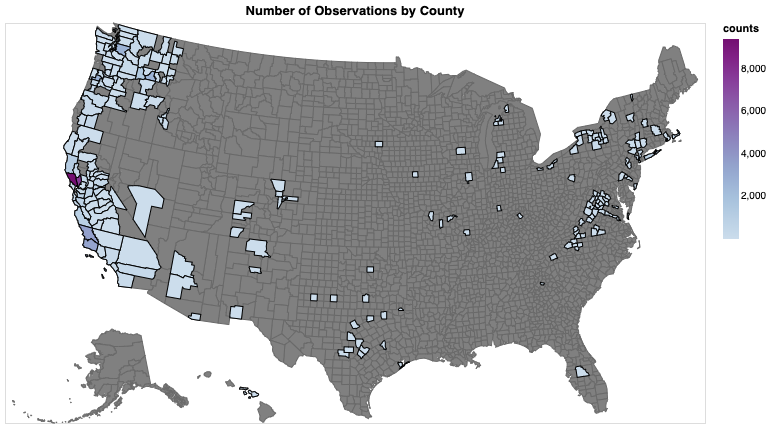

In [11]:
counties = alt.topo_feature(data.us_10m.url, 'counties')

foreground = alt.Chart(counties).mark_geoshape().encode(
    color=alt.Color('counts:Q',
                    scale=alt.Scale(scheme='bluepurple'))
).mark_geoshape(
    stroke='black',
    strokeWidth=1
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(county_counts, 'county_id', ['counts'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

background = alt.Chart(counties).mark_geoshape(
    fill='gray',
    stroke='dimgray'
).properties(
    title='Number of Observations by County',
    width=700,
    height=400
).project('albersUsa')

background + foreground

# ATTEMPTING TO MAKE THE MAP INTERACTIVE

#### WRANGLE THE DF TO GET PROPER COLUMN NAMES

In [12]:
wine_df = df.rename(columns={"state": 'State',
                              "state_id": 'State ID',
                              "points": 'Points',
                              "price": 'Price',
                              "value_scaled": 'Value'})

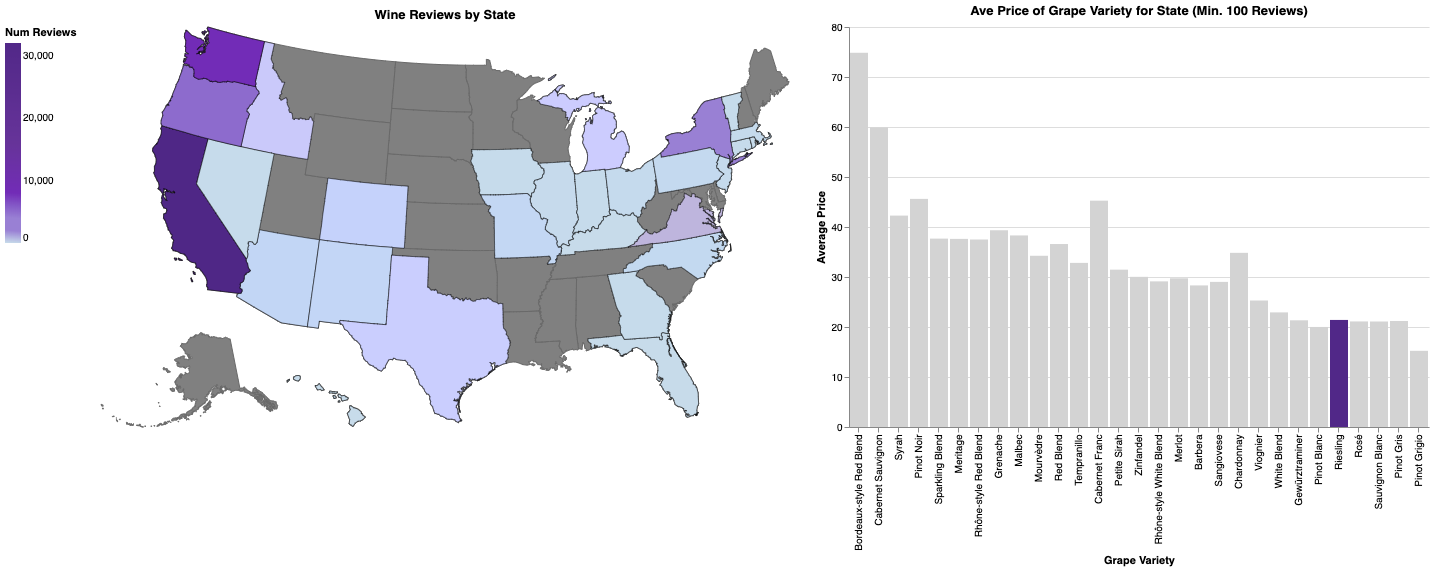

In [13]:

#######
# NOTES:
# - Add dynamic title and chart elements with Dash
# - Add sorting with Dash (i.e. send in a new dataframe based on Dash etc.)
# - Add in slider bar for filtering with Dash (number of reviews, etc.)


counties = alt.topo_feature(data.us_10m.url, 'counties')
states = alt.topo_feature(data.us_10m.url, "states")

colormap = alt.Scale(domain=[0, 100, 1000, 2000, 4000, 8000, 16000, 32000],
                     range=['#C7DBEA', '#CCCCFF', '#B8AED2', '#3A41C61',
                            '#9980D4', '#722CB7', '#663399', '#512888'])

click = alt.selection_single(fields=['State'], empty='all')


# MAP OF ALL STATES
foreground = alt.Chart(states).mark_geoshape().encode(
    color=alt.Color('Num Reviews:Q',
                    scale=colormap,
                    legend=alt.Legend(orient='left')),
    tooltip=[alt.Tooltip('State:O'), 
             alt.Tooltip('Ave Points:Q', format='.2f'),
             alt.Tooltip('Ave Price:Q', format='$.2f'),
             alt.Tooltip('Ave Value:Q', format='.2f'),
             alt.Tooltip('Num Reviews:Q')]
).mark_geoshape(
    stroke='black',
    strokeWidth=0.5
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(wine_states, 
                         'State ID', 
                         ['State', 'State ID', 'Ave Points', 'Ave Price', 'Ave Value', 'Num Reviews'])
).project(
    type='albersUsa'
).add_selection(
    click
)


# BACKGROUND MAP OF ALL STATES
background = alt.Chart(states).mark_geoshape(
    fill='gray',
    stroke='dimgray'
).project(
    'albersUsa'
).properties(
    title='Wine Reviews by State'
)


# Dynamic Bar Plot
bar_basic = alt.Chart(wine_df).mark_bar().encode(
    x=alt.X('variety:O', 
            title="Grape Variety",
            sort=alt.EncodingSortField(
                field='mean_price',
                order='descending')),
    y=alt.Y('mean_price:Q',
            title="Average Price"),
    color=alt.condition(
                alt.datum['variety'] == wine_df['variety'][0],
                alt.value('#512888'),
                alt.value('lightgrey')),
    tooltip=[alt.Tooltip('State:O'),
             alt.Tooltip('mean_price:Q', format='$.2f'),
             alt.Tooltip('mean_points:Q', format='.2f'),
             alt.Tooltip('mean_value:Q', format='.2f'),
             alt.Tooltip('num_reviews:N')]
).transform_filter(
    click,
).transform_aggregate(
    mean_price='mean(Price)',
    mean_points='mean(Points)',
    mean_value='mean(Value)',
    num_reviews='count(Price)',
    groupby=["State", "variety"]
).transform_filter(
    alt.FieldGTPredicate(field='num_reviews', gt=100)
).properties(
    title=f'Ave Price of Grape Variety for State (Min. 100 Reviews)'
)

maps = (background + foreground)
final_plot = (maps | bar_basic).configure_view(
    height=400,
    width=700,
    strokeWidth=4,
    fill=None,
    stroke=None,
)

final_plot

### Basic Bar Plot with Transformations

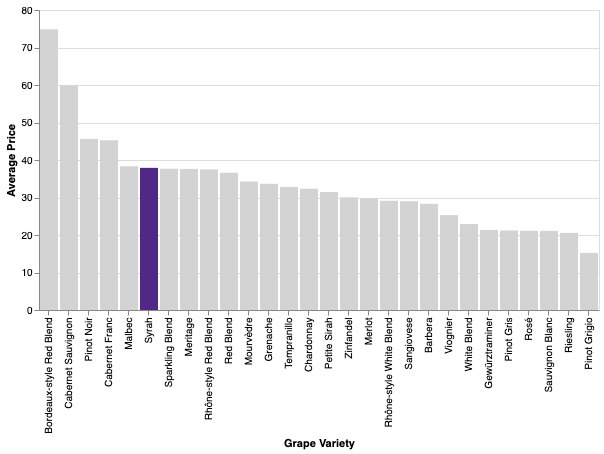

In [86]:
# BAR PLOT
bar_basic = alt.Chart(wine_df).transform_filter(
    alt.FieldEqualPredicate(field='State', equal='California')
).transform_aggregate(
    mean_price='mean(Price)',
    mean_points='mean(Points)',
    mean_value='mean(Value)',
    num_reviews='count(Price)',
    groupby=["variety"]
).transform_filter(
    alt.FieldGTPredicate(field='num_reviews', gt=100)
).mark_bar().encode(
    x=alt.X('variety:O', 
            title="Grape Variety",
            sort=alt.EncodingSortField(
               field='mean_price',
               order='descending')),
    y=alt.Y('mean_price:Q',
            title="Average Price"),
    color=alt.condition(
                alt.datum['variety'] == wine_df.sort_values(by=['Price'], ascending=False).variety.iloc[0],
                alt.value('#512888'),
                alt.value('lightgrey')),
    tooltip=[alt.Tooltip('State:O'),
             alt.Tooltip('mean_price:Q', format='$.2f'),
             alt.Tooltip('mean_points:Q', format='.2f'),
             alt.Tooltip('mean_value:Q', format='.2f'),
             alt.Tooltip('num_reviews:N')]
)

bar_basic

In [79]:
# wine_df.sort_values(by=['Price'], ascending=False)
wine_df.sort_values(['Price','variety'], ascending=False).groupby('variety').head(1).head()

,Points,title,description,Price,designation,variety,region_1,State,winery,county,county_id,State ID,value,Value
46258,92,Law 2013 Intrepid Syrah (Paso Robles),"This is a powerful bottling, as is expected by...",750.0,Intrepid,Syrah,Paso Robles,California,Law,San Luis Obispo County,6079,6,0.122667,23.000
46160,97,Yao Ming 2009 Family Reserve Cabernet Sauvigno...,The former basketball star's initial release i...,625.0,Family Reserve,Cabernet Sauvignon,Napa Valley,California,Yao Ming,Napa County,6055,6,0.155200,36.375
49177,94,Harlan Estate 2006 Red (Napa Valley),"Here's a big, flashy, cult-style wine if ever ...",500.0,NaN,Bordeaux-style Red Blend,Napa Valley,California,Harlan Estate,Napa County,6055,6,0.188000,47.000
50158,99,Colgin 2008 IX Estate Red (Napa Valley),This is an absolutely beautiful wine to drink ...,290.0,IX Estate,Red Blend,Napa Valley,California,Colgin,Napa County,6055,6,0.341379,70.290
4346,93,Domaine Serene 2012 Monogram Pinot Noir (Willa...,"As befits this ripe and forward vintage, this ...",275.0,Monogram,Pinot Noir,Willamette Valley,Oregon,Domaine Serene,Yamhill County,41071,41,0.338182,67.425


In [65]:
wine_df.sort_values(by=['Price'], ascending=False).variety
# pd.merge(wine_states, wine_df, how='left', on=['State', 'State ID']).query("State == 'California'")


46258                       Syrah
46157          Cabernet Sauvignon
46158          Cabernet Sauvignon
46160          Cabernet Sauvignon
49177    Bordeaux-style Red Blend
                   ...           
49905                  Chardonnay
49999          Cabernet Sauvignon
50156          Cabernet Sauvignon
50317                 Tempranillo
50763                  Gamay Noir
Name: variety, Length: 50985, dtype: object

In [ ]:
pd.merge(wine_states, wine_df, how='right', on=['State'])